In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
cd /content/gdrive/My\ Drive/SetareToranj

/content/gdrive/My Drive/SetareToranj


In [0]:
df = pd.read_excel('digi_clean_final.xlsx')

In [0]:
df.head()

,Unnamed: 0,product_title,title_en,likes,dislikes,recommend,title,comment,advantages,disadvantages,comment_len,word_count,catg_likes,catg_dislikes
0,1,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,AC,4,1,2,واقعا عالیه,سلام قبل اینکه نظرم رو بگم میخواستم موضوع مهم ...,عمر طولانی افت بسیار کم میزان شارژ امپر خروجی ...,داشت#دار,770,144,-75,-75
1,2,یدک پولیشر میکروفایبر مهسان مدل 20119,HW,1,0,0,خیلی سخت حوله اش میاد,گیره های فلزی خیلی سخت میشوند لذا حوله خیلی سخ...,فیلد خالی,فیلد خالی,228,46,-75,-75
2,3,گوشی موبایل هوآوی آنر مدل 5X KIW-L21 دو سیم‌کارت,MO,6,11,1,گوشی مقرون صرفه,چیز رابطه ظاهر گوشی بسیار خوب است بدنه یکپارچه...,صفحه نمایش پرنور کیفیت کیفیت بالای ساخت باتری ...,کیفیت پایین اسپیکر حاشیه خالی زیر صفحه نمایش ع...,1018,181,-75,-75
3,4,شارژر همراه شیائومی مدل Mi ظرفیت 5000 میلی آمپ...,AC,19,4,1,ابعاد استحکام نگهداری شارژ مناسب,ظرفیتش براتون کافیه حتما بخرید یه شارژر ۵ ولت ...,ظریف زیبا باریک بدنه محکم دوام,ظرفیت متوسط,292,57,-75,-75
4,5,لپ تاپ 15 اینچی ایسوس مدل N501VW - A,IT,6,1,2,اقرار بیش حد ایراد گرفتن,سلام دوستان منم مثه بعضی دوستان قبل خرید کلی ت...,همه چیز تو مشخصات اومده بجز ۳ کوچیک,تاچ پدش میتونست بهتر باشه سرعت پاسخ گویی حس کی...,990,195,-75,-75


In [0]:
del df['Unnamed: 0']

In [0]:
df[df['likes'] >=2].count()

product_title    46981
title_en         46981
likes            46981
dislikes         46981
recommend        46981
title            46981
comment          46981
advantages       46981
disadvantages    46981
comment_len      46981
word_count       46981
catg_likes       46981
catg_dislikes    46981
dtype: int64

In [0]:
df[df['dislikes'] >=1].count()

product_title    42562
title_en         42562
likes            42562
dislikes         42562
recommend        42562
title            42562
comment          42562
advantages       42562
disadvantages    42562
comment_len      42562
word_count       42562
catg_likes       42562
catg_dislikes    42562
dtype: int64

In [0]:
# lowlike = df.likes[df.likes <= 75].count()
# highlike = df.likes[df.likes > 150].count()
# midlike = df.likes[(df['likes'] > 75) & (df['likes'] <= 150)].count()

In [10]:
#Get Most Frequent Words in title
from collections import Counter
freq = Counter(" ".join(df["title"]).split()).most_common(50)
freq

[('کیفیت', 6533),
 ('عالی', 6446),
 ('خوب', 4390),
 ('خیلی', 4052),
 ('عالیه', 3128),
 ('خالی', 3036),
 ('فیلد', 3007),
 ('پیشنهاد', 2932),
 ('بسیار', 2722),
 ('خوبه', 2464),
 ('خرید', 2379),
 ('بی', 2298),
 ('نیست', 1844),
 ('قیمت', 1776),
 ('مناسب', 1628),
 ('میکنم', 1572),
 ('محصول', 1321),
 ('بد', 1308),
 ('اصلا', 1271),
 ('زیبا', 1269),
 ('ارزش', 1249),
 ('راضی', 1118),
 ('حتما', 1097),
 ('داره', 1013),
 ('فوق', 1005),
 ('نسبت', 965),
 ('واقعا', 933),
 ('العاده', 890),
 ('استفاده', 881),
 ('بهترین', 853),
 ('جنس', 852),
 ('نداره', 847),
 ('ولی', 786),
 ('خوبیه', 745),
 ('پایین', 730),
 ('نمیکنم', 706),
 ('رو', 699),
 ('بالا', 674),
 ('بخرید', 656),
 ('می', 636),
 ('کاربردی', 633),
 ('شیک', 623),
 ('هست', 617),
 ('ضعیف', 609),
 ('مدل', 583),
 ('خوش', 570),
 ('کار', 569),
 ('بررسی', 536),
 ('خوبی', 535),
 ('گوشی', 534)]

In [0]:
n = 0 # N. . .
word_title= [x[n] for x in freq]

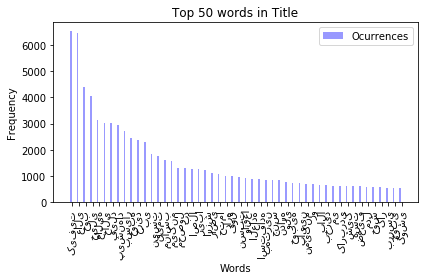

In [12]:
#Plot the common words in title
data = freq

n_groups = len(data)

vals_films = [x[1] for x in data]
legends_films = [x[0] for x in data]

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

rects1 = plt.bar(index, vals_films, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Ocurrences')


plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 50 words in Title')
plt.xticks(index + bar_width, legends_films,rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

In [0]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from textblob import TextBlob
from textblob import Word

In [0]:
# Group Comments based on likes
df3 = df.groupby('catg_likes').agg(lambda x: x.tolist())

In [0]:
# Group Comments based on dislikes
df4 = df.groupby('catg_dislikes').agg(lambda x: x.tolist())

In [0]:
df_lowlike = df[df['catg_likes'] == '-75']

In [0]:
df_midlike = df[df['catg_likes'] == 'between']

In [0]:
df_highlike = df[df['catg_likes'] == '+150']

In [0]:
df_lowdislike = df[df['catg_dislikes'] == '-75']

In [0]:
df_middislike = df[df['catg_dislikes'] == '-75']

In [0]:
df_highdislike = df[df['catg_dislikes'] == '-75']

In [0]:
#Get Most Frequent Words in title in low likes
freq20 = Counter(" ".join(df_lowlike["title"]).split()).most_common(10)
freq20

[('کیفیت', 6523),
 ('عالی', 6441),
 ('خوب', 4390),
 ('خیلی', 4045),
 ('عالیه', 3124),
 ('خالی', 3029),
 ('فیلد', 3000),
 ('پیشنهاد', 2931),
 ('بسیار', 2719),
 ('خوبه', 2461)]

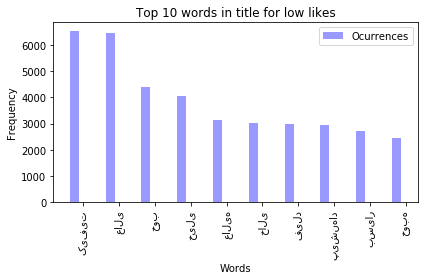

In [0]:
#Plot the common words in title
data = freq20

n_groups = len(data)

vals_films = [x[1] for x in data]
legends_films = [x[0] for x in data]

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

rects1 = plt.bar(index, vals_films, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Ocurrences')


plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 words in title for low likes')
plt.xticks(index + bar_width, legends_films, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

In [0]:
#Get Most Frequent Words in title in mid likes
freq2 = Counter(" ".join(df_midlike["title"]).split()).most_common(10)
freq2

[('کیفیت', 10),
 ('قیمت', 9),
 ('خیلی', 6),
 ('بالا', 6),
 ('گوشی', 6),
 ('فیلد', 5),
 ('خالی', 5),
 ('ولی', 5),
 ('ارزش', 5),
 ('بی', 5)]

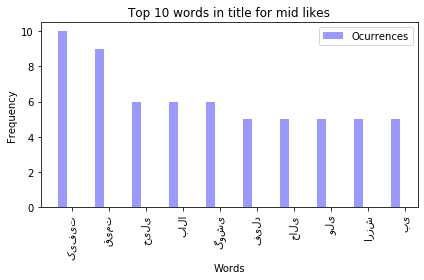

In [0]:
#Plot the common words in title
data = freq2

n_groups = len(data)

vals_films = [x[1] for x in data]
legends_films = [x[0] for x in data]

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

rects1 = plt.bar(index, vals_films, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Ocurrences')


plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 words in title for mid likes')
plt.xticks(index + bar_width, legends_films, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

In [0]:
#Get Most Frequent Words in title in high likes
freq3 = Counter(" ".join(df_highlike["title"]).split()).most_common(10)
freq3

[('عالی', 2),
 ('واقعا', 2),
 ('بعد', 2),
 ('عالیه', 2),
 ('فیلد', 2),
 ('خالی', 2),
 ('پراید', 1),
 ('خودرو', 1),
 ('نجومی', 1),
 ('کلاهبرداری', 1)]

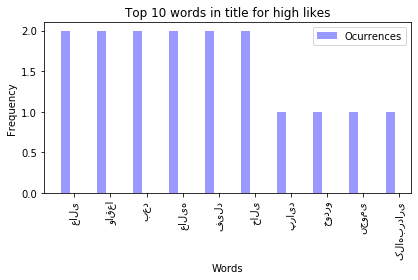

In [0]:
#Plot the common words in title
data = freq3

n_groups = len(data)

vals_films = [x[1] for x in data]
legends_films = [x[0] for x in data]

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

rects1 = plt.bar(index, vals_films, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Ocurrences')


plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 words in title for high likes')
plt.xticks(index + bar_width, legends_films, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

In [0]:
#Get Most Frequent Words in title in low dislikes
freq4 = Counter(" ".join(df_lowdislike["title"]).split()).most_common(10)
freq4

[('کیفیت', 6528),
 ('عالی', 6438),
 ('خوب', 4387),
 ('خیلی', 4047),
 ('عالیه', 3120),
 ('خالی', 3029),
 ('فیلد', 3000),
 ('پیشنهاد', 2930),
 ('بسیار', 2718),
 ('خوبه', 2462)]

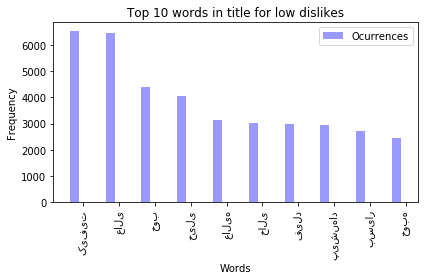

In [0]:
#Plot the common words in title
data = freq4

n_groups = len(data)

vals_films = [x[1] for x in data]
legends_films = [x[0] for x in data]

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

rects1 = plt.bar(index, vals_films, bar_width,
                 alpha=opacity, 
                 color='b',
                 label='Ocurrences')


plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 words in title for low dislikes')
plt.xticks(index + bar_width, legends_films, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

In [0]:
#Get Most Frequent Words in title in mid dislikes
freq5 = Counter(" ".join(df_middislike["title"]).split()).most_common(10)
freq5

[('کیفیت', 6528),
 ('عالی', 6438),
 ('خوب', 4387),
 ('خیلی', 4047),
 ('عالیه', 3120),
 ('خالی', 3029),
 ('فیلد', 3000),
 ('پیشنهاد', 2930),
 ('بسیار', 2718),
 ('خوبه', 2462)]

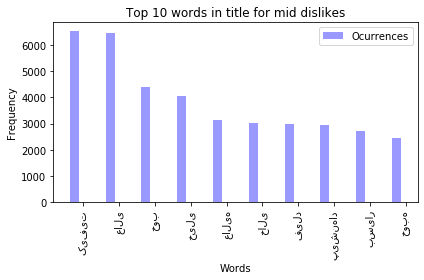

In [0]:
#Plot the common words in title
data = freq5

n_groups = len(data)

vals_films = [x[1] for x in data]
legends_films = [x[0] for x in data]

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

rects1 = plt.bar(index, vals_films, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Ocurrences')


plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 words in title for mid dislikes')
plt.xticks(index + bar_width, legends_films, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

In [0]:
#Get Most Frequent Words in title in high dislikes
freq6 = Counter(" ".join(df_highdislike["title"]).split()).most_common(10)
freq6

[('کیفیت', 6528),
 ('عالی', 6438),
 ('خوب', 4387),
 ('خیلی', 4047),
 ('عالیه', 3120),
 ('خالی', 3029),
 ('فیلد', 3000),
 ('پیشنهاد', 2930),
 ('بسیار', 2718),
 ('خوبه', 2462)]

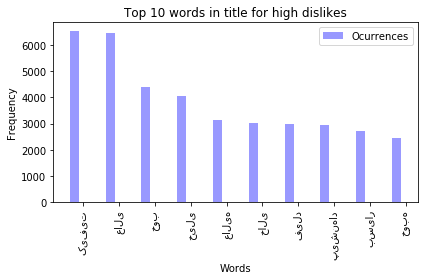

In [0]:
#Plot the common words in title
data = freq6

n_groups = len(data)

vals_films = [x[1] for x in data]
legends_films = [x[0] for x in data]

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

rects1 = plt.bar(index, vals_films, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Ocurrences')


plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 words in title for high dislikes')
plt.xticks(index + bar_width, legends_films, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

#wordcloud

In [14]:
!pip install persian_wordcloud

In [0]:
from os import path
from persian_wordcloud.wordcloud import PersianWordCloud, add_stop_words
import matplotlib.image as mpimg

In [0]:
stopwords = []
file = open('stopwords-fa2.txt').read()
[stopwords.append(x) for x in file.split('\n')]
stopwords = set(stopwords)

###Show Most Frequent Words in titles


In [0]:
with open("freq_words.txt", "w") as output:
    output.write(str(word_title))

In [0]:
text = open('freq_words.txt', encoding='utf-8').read()

In [0]:
wordcloud = PersianWordCloud(only_persian=True,
max_words=100,
stopwords=stopwords,
margin=0,
width=800,
height=800,
    min_font_size=1,
    max_font_size=500,
    background_color="black"
).generate(text)

In [0]:
image = wordcloud.to_image()
image.show()

In [0]:
image.save('wordcloud_titles.png')

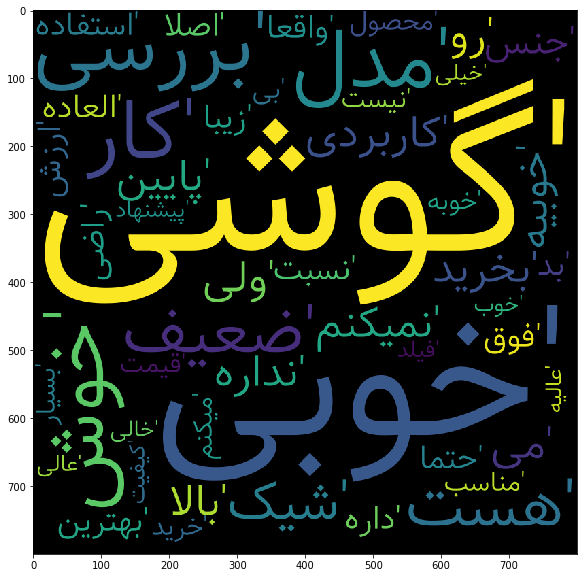

In [0]:
import matplotlib.image as mpimg
img=mpimg.imread('wordcloud_titles.png')
plt.figure(figsize = (10,10))
imgplot = plt.imshow(img)
plt.show()

### Show Most Frequent Words as TITLE in Highly Disliked Comments


In [0]:
#Get Most Frequent Words in title
from collections import Counter
freq7 = Counter(" ".join(df_highdislike["title"]).split()).most_common(30)

In [0]:
n = 0 # N. . .
negative_text = [x[n] for x in freq7]

In [0]:
with open("negative_title.txt", "w") as output:
    output.write(str(negative_text))

In [0]:
text = open('negative_title.txt', encoding='utf-8').read()
wordcloud = PersianWordCloud(only_persian=True,
max_words=100,
stopwords=stopwords,
margin=0,
width=800,
height=800,
    min_font_size=1,
    max_font_size=500,
    background_color="black"
).generate(text)

image = wordcloud.to_image()
image.show()

image.save('negative_wordcloud_title.png')

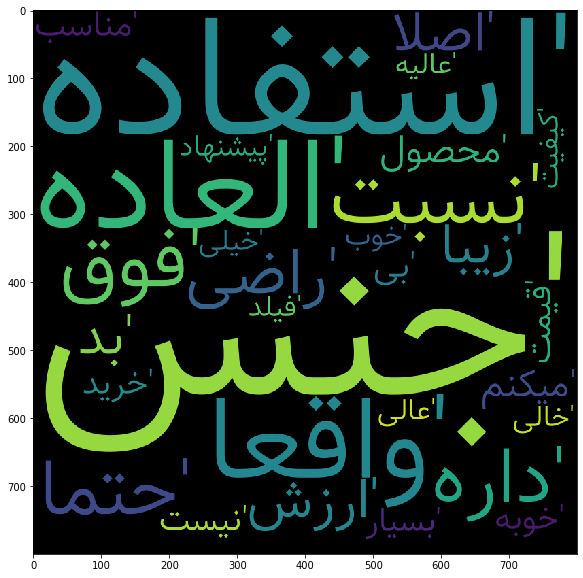

In [0]:
img=mpimg.imread('negative_wordcloud_title.png')
plt.figure(figsize = (10,10))
imgplot = plt.imshow(img)
plt.show()

#### Show Most Frequent words as TITLE in Highly liked Comments

In [0]:
#Get Most Frequent Words in title
from collections import Counter
freq8 = Counter(" ".join(df_highlike["title"]).split()).most_common(30)

In [0]:
n = 0 # N. . .
positive_text = [x[n] for x in freq8]

In [0]:
with open("positive_title.txt", "w") as output:
    output.write(str(positive_text))

In [0]:
text = open('positive_title.txt', encoding='utf-8').read()
wordcloud = PersianWordCloud(only_persian=True,
max_words=100,
stopwords=stopwords,
margin=0,
width=800,
height=800,
    min_font_size=1,
    max_font_size=500,
    background_color="black"
).generate(text)

image = wordcloud.to_image()
image.show()

image.save('positive_wordcloud_title.png')

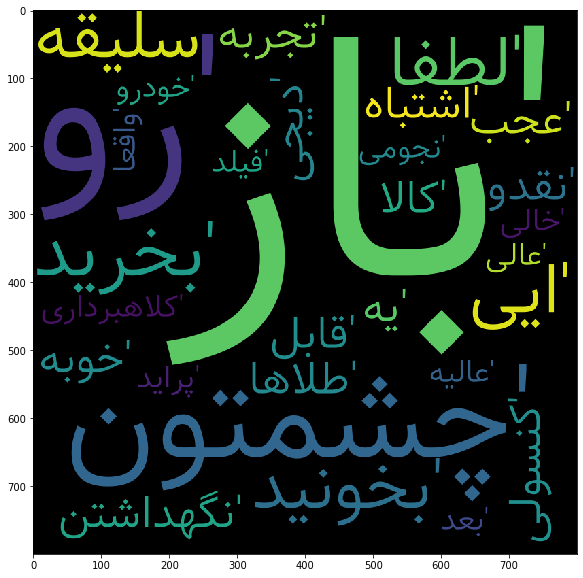

In [0]:
img=mpimg.imread('positive_wordcloud_title.png')
plt.figure(figsize = (10,10))
imgplot = plt.imshow(img)
plt.show()

### Word Cloud For AC Product with High Likes and Low Dislikes in Titles

In [0]:
df_positive_AC = df[(df['title_en'] == 'AC') & (df['catg_likes'] == '+150') & (df['catg_dislikes'] == '-75')]

In [0]:
df_positive_AC.head()

,product_title,title_en,likes,dislikes,recommend,title,comment,advantages,disadvantages,comment_len,word_count,catg_likes,catg_dislikes
24764,هندزفری بلوتوث مدل i7S-TWS,AC,291,12,1,یه اشتباه قابل نگهداشتن {سلیقه ایی} لطفا بخونی...,نوشتن متن کوتاه بگذریم یه راست سر اصل مطلب شار...,باکس شارژ معمولی کوچک هر چی فکر میکنم دیگه نکت...,۲ساعت مد کاری استریو {دوتایی} ۴ ساعت دونه دونه...,2225,438,+150,-75


In [0]:
#Get Most Frequent Words in title
from collections import Counter
ac_comm = Counter(" ".join(df_positive_AC["title"]).split()).most_common(30)

In [0]:
n = 0 # N. . .
positive_ac1 = [x[n] for x in ac_comm]

In [0]:
with open("positive_ac1_title.txt", "w") as output:
    output.write(str(positive_ac1))

In [0]:
text = open('positive_ac1_title.txt', encoding='utf-8').read()
wordcloud = PersianWordCloud(only_persian=True,
max_words=100,
stopwords=stopwords,
margin=0,
width=800,
height=800,
    min_font_size=1,
    max_font_size=500,
    background_color="black"
).generate(text)

image = wordcloud.to_image()
image.show()

image.save('positive_ac1_wc_title.png')

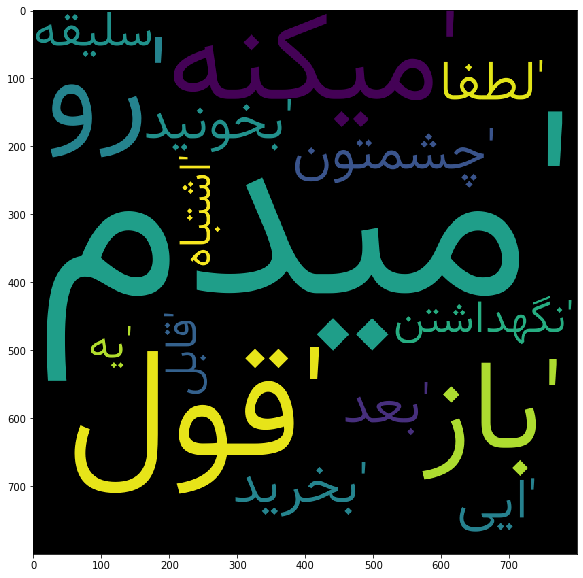

In [0]:
img=mpimg.imread('positive_ac1_wc_title.png')
plt.figure(figsize = (10,10))
imgplot = plt.imshow(img)
plt.show()

### Word Cloud For AC Product with Low Likes and High Dislikes in Titles

In [0]:
df_negative_AC = df[(df['title_en'] == 'AC') & (df['catg_likes'] == '-75') & (df['catg_dislikes'] == 'between')]

In [0]:
df_negative_AC.head()

,product_title,title_en,likes,dislikes,recommend,title,comment,advantages,disadvantages,comment_len,word_count,catg_likes,catg_dislikes
14851,اینورتر فنجانی انرجایزر مدل 180WATT,AC,6,124,1,عالیه,سلام تو شگفت انگیز خریدم امسال تو قطعی برق ها ...,فیلد خالی,فیلد خالی,93,19,-75,between
19455,شارژر همراه انکر مدل A1214 PowerCore ظرفیت 104...,AC,7,86,2,بی نقص,هیچ کس کالاهای دیجیتال سایت دیجی کالا نمی توان...,فیلد خالی,فیلد خالی,64,12,-75,between
60737,شارژر دیواری مک کوی مدل MC-CH01 به همراه 2 عدد...,AC,5,87,1,فعلا نمیتونم قطعی بدم,تازه خریدم فعلا نمیتونم قطعی بدم!,فیلد خالی,فیلد خالی,33,6,-75,between


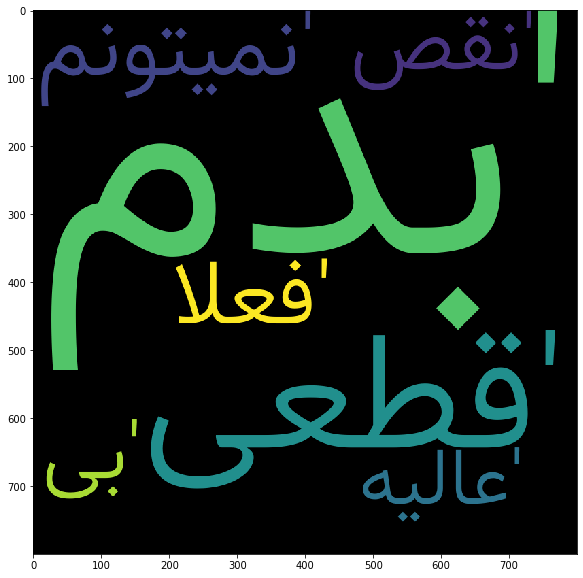

In [0]:
#Get Most Frequent Words for AC products in titles
from collections import Counter
ac_comm2 = Counter(" ".join(df_negative_AC["title"]).split()).most_common(30)

n = 0 # N. . .
negative_ac1 = [x[n] for x in ac_comm2]

with open("negative_ac1_title.txt", "w") as output:
    output.write(str(negative_ac1))

text = open('negative_ac1_title.txt', encoding='utf-8').read()
wordcloud = PersianWordCloud(only_persian=True,
max_words=100,
stopwords=stopwords,
margin=0,
width=800,
height=800,
    min_font_size=1,
    max_font_size=500,
    background_color="black"
).generate(text)

image = wordcloud.to_image()
image.show()

image.save('negative_ac1_wc_title.png')

img=mpimg.imread('negative_ac1_wc_title.png')
plt.figure(figsize = (10,10))
imgplot = plt.imshow(img)
plt.show()

In [0]:
df.title_en.unique()

array(['AC', 'HW', 'MO', 'IT', 'PC', 'PA', 'TC', 'TS', 'MA', 'HA', 'AV',
       'FA', 'HC', 'BC', 'DF', 'GC', 'FF'], dtype=object)

### Word Cloud For IT Product with High Likes and Low Dislikes in Titles

In [0]:
df_positive_IT = df[(df['title_en'] == 'IT') & (df['catg_likes'] == '+150') & (df['catg_dislikes'] == '-75')]

In [0]:
df_positive_IT.head()

,product_title,title_en,likes,dislikes,recommend,title,comment,advantages,disadvantages,comment_len,word_count,catg_likes,catg_dislikes
13515,لپ تاپ 11 اینچی لنوو مدل Yoga 300-11IBR N3060,IT,777,35,1,عالی,بهترین خرید پرزنت های کاری بهترین دستگاه مسافر...,فیلد خالی,فیلد خالی,55,10,+150,-75
16700,لپ تاپ 11 اینچی لنوو مدل Yoga 300-11IBR N3060,IT,854,21,1,واقعا خوبه,سلام لب تاپ رو روز خریدم واقعا مثل دانشجوعه عا...,فیلد خالی,فیلد خالی,234,46,+150,-75


In [0]:
#Get Most Frequent Words in title with high likes & low dislikes
from collections import Counter
it_comm = Counter(" ".join(df_positive_IT["title"]).split()).most_common(30)

In [0]:
n = 0 # N. . .
positive_it = [x[n] for x in it_comm]

In [0]:
with open("positive_it_title.txt", "w") as output:
    output.write(str(positive_it))

In [0]:
text = open('positive_it_title.txt', encoding='utf-8').read()
wordcloud = PersianWordCloud(only_persian=True,
max_words=100,
stopwords=stopwords,
margin=0,
width=800,
height=800,
    min_font_size=1,
    max_font_size=500,
    background_color="black"
).generate(text)

image = wordcloud.to_image()
image.show()

image.save('positive_it_title.png')

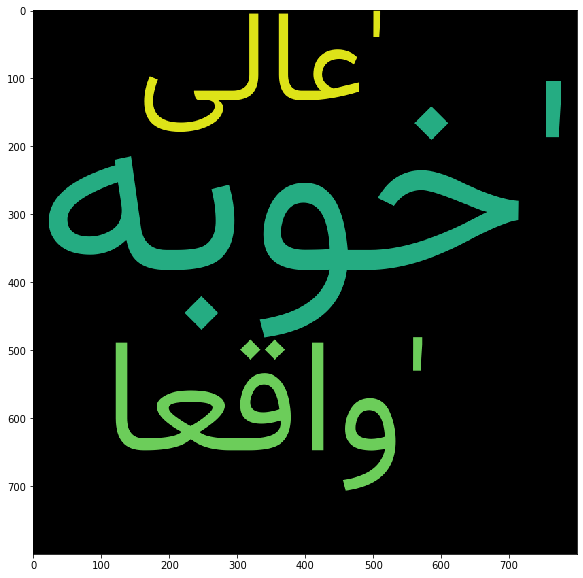

In [0]:
img=mpimg.imread('positive_it_title.png')
plt.figure(figsize = (10,10))
imgplot = plt.imshow(img)
plt.show()

### Word Cloud For IT Product with Low Likes and High Dislikes in Titles

In [0]:
df_negative_IT = df[(df['title_en'] == 'IT') & (df['catg_likes'] == '-75') & (df['catg_dislikes'] == 'between')]

In [19]:
df_negative_IT.head()

,product_title,title_en,likes,dislikes,recommend,title,comment,advantages,disadvantages,comment_len,word_count,catg_likes,catg_dislikes
28051,مانیتور سامسونگ مدل C49HG90 سایز 48.9 اینچ,IT,70,80,2,آنتخاب چشمان باز,سلام بنده خردار مانیتور ۲۱:۹ ال جی بودم اون رو...,مالتی تسک ۳۲:۹ سرعت پاسخ دهی بالا,نا مناسب سیستم های عقب افتاده,972,183,-75,between
28230,اس اس دی اینترنال اچ پی مدل SAS Read Intensive...,IT,5,120,1,قیمت کیفیت عالی,خریدم اینو خیلی خوبه کیفیت ساخت سرعت,فیلد خالی,فیلد خالی,36,7,-75,between
52741,کامپیوتر همه کاره 27 اینچی اپل مدل iMac Pro 20...,IT,4,92,1,کامپیوتر اپل,آقا خیلی عالیه کامپیوتر رو ماهه دارم بازی کردن...,فیلد خالی,فیلد خالی,123,23,-75,between
58466,اس اس دی اینترنال اچ پی مدل SAS Read Intensive...,IT,2,94,1,بهترین,وقتی خریدم سرعت لودینگ بازیا خیلی بهتر شده تو ...,سرعت,ندارع,60,12,-75,between


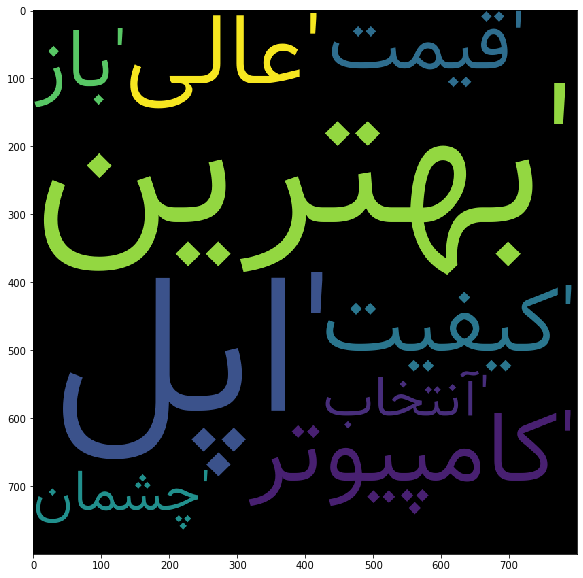

In [21]:
#Get Most Frequent Words for IT products in titles
from collections import Counter
it_comm2 = Counter(" ".join(df_negative_IT["title"]).split()).most_common(30)

n = 0 # N. . .
negative_it = [x[n] for x in it_comm2]

with open("negative_it_title.txt", "w") as output:
    output.write(str(negative_it))

text = open('negative_it_title.txt', encoding='utf-8').read()
wordcloud = PersianWordCloud(only_persian=True,
max_words=100,
stopwords=stopwords,
margin=0,
width=800,
height=800,
    min_font_size=1,
    max_font_size=500,
    background_color="black"
).generate(text)

image = wordcloud.to_image()
image.show()

image.save('negative_it_title.png')

img=mpimg.imread('negative_it_title.png')
plt.figure(figsize = (10,10))
imgplot = plt.imshow(img)
plt.show()